# Naive Bayes Analysis on Salary Data

-------------------- ### -------------------------------------

## Problem Statement:

### 1.) Prepare a classification model using the Naive Bayes algorithm for the salary dataset. Train and test datasets are given separately. Use both for model building. 

We will perform EDA on the data, post that we will build models

- Lets load necessary libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We have 2 datasets, one for Training and one for Testing. We will load both these datasets and see what information we have in these datasets

In [2]:
train = pd.read_csv("SalaryData_Train.csv")
train.shape

(30161, 14)

We have 30161 rows and 14 columns

In [3]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [4]:
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
import missingno as msno

Lets see how many missing values we have in our train dataset

<AxesSubplot:>

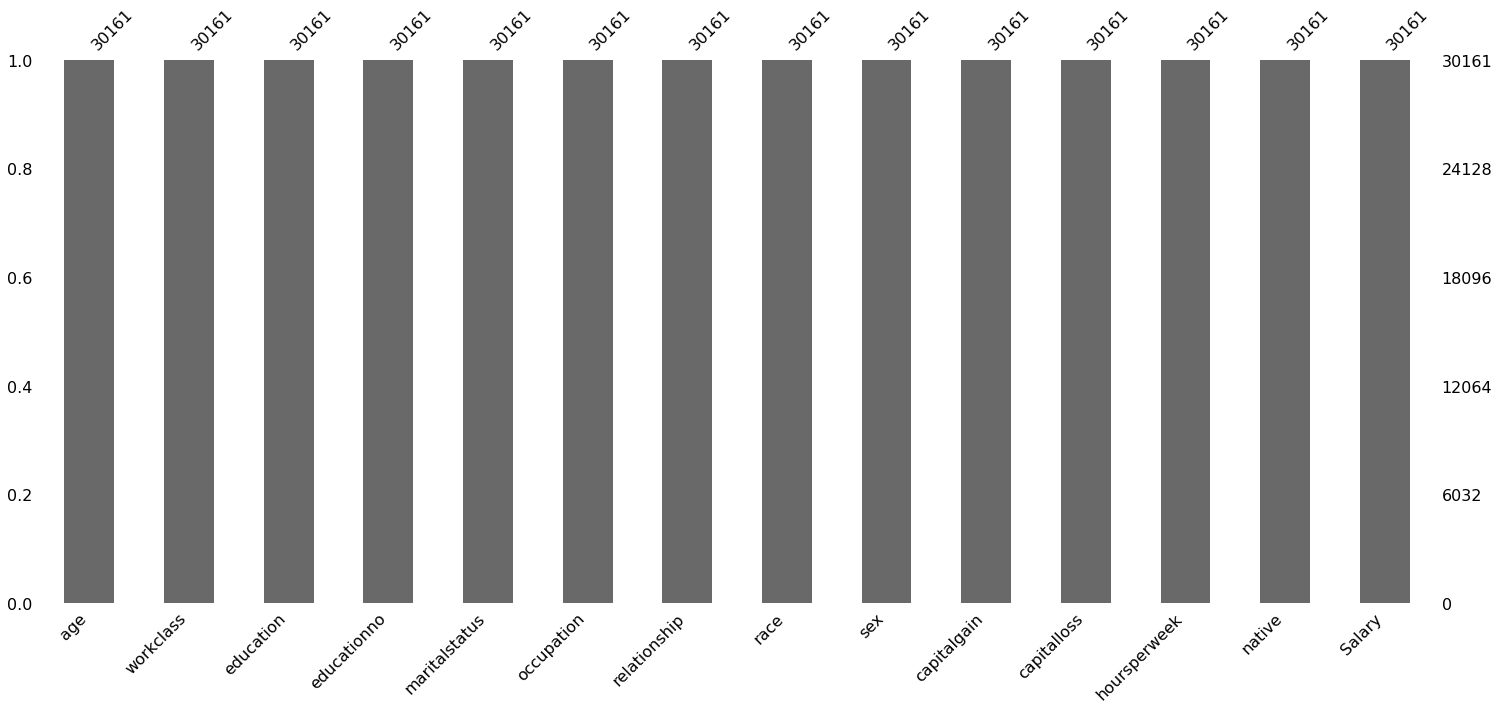

In [8]:
msno.bar(train)

There are no missing value in our train dataset

Let's look at the describe function to see how our numerical values are spread

<AxesSubplot:>

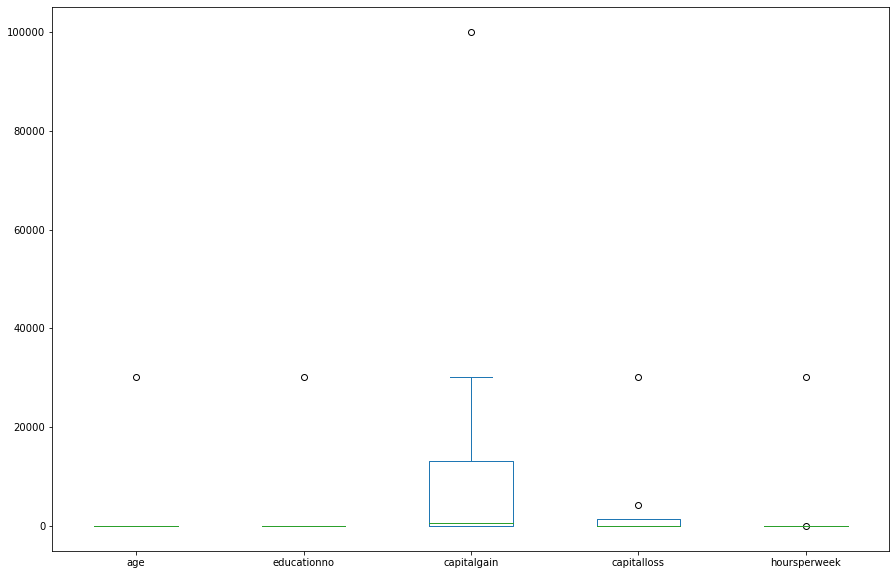

In [9]:
plt.rcParams['figure.figsize']=(15,10)
train.describe().plot(kind='box')

In [10]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

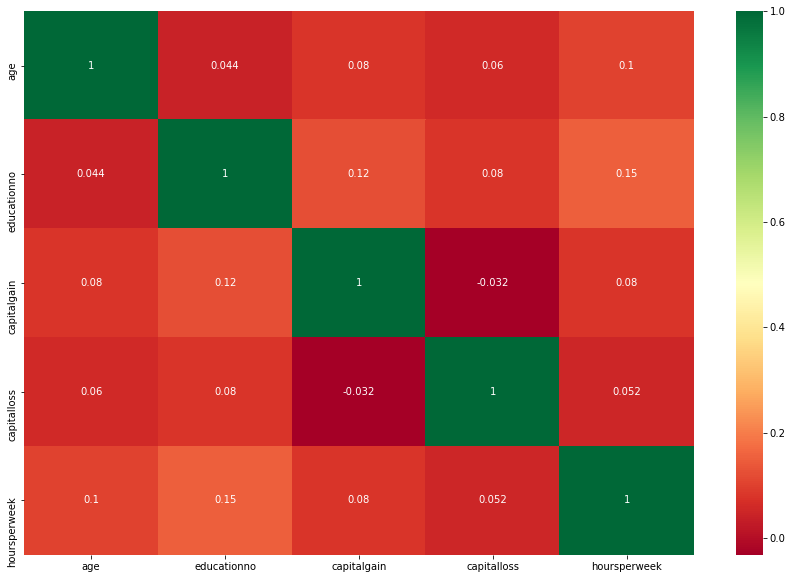

In [11]:
sns.heatmap(train.corr(), cmap='RdYlGn',annot=True)

Correlation between numerical variables is low

### Now lets plot some graphs to understand our data better

In [12]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation between Age and Education, with Salary as Hue')

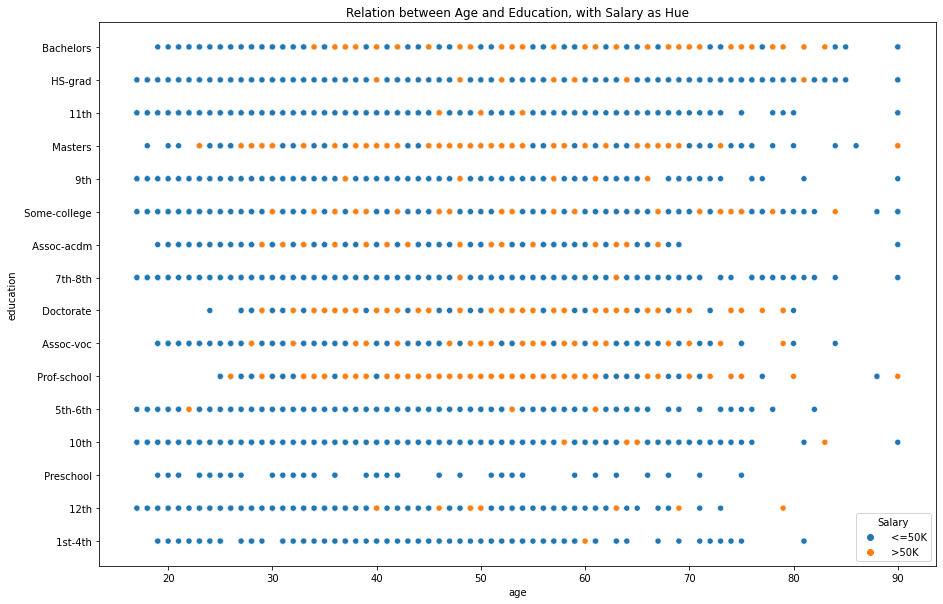

In [13]:
sns.scatterplot('age','education', data=train, hue='Salary');
plt.title("Relation between Age and Education, with Salary as Hue")

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation between Salary and Education')

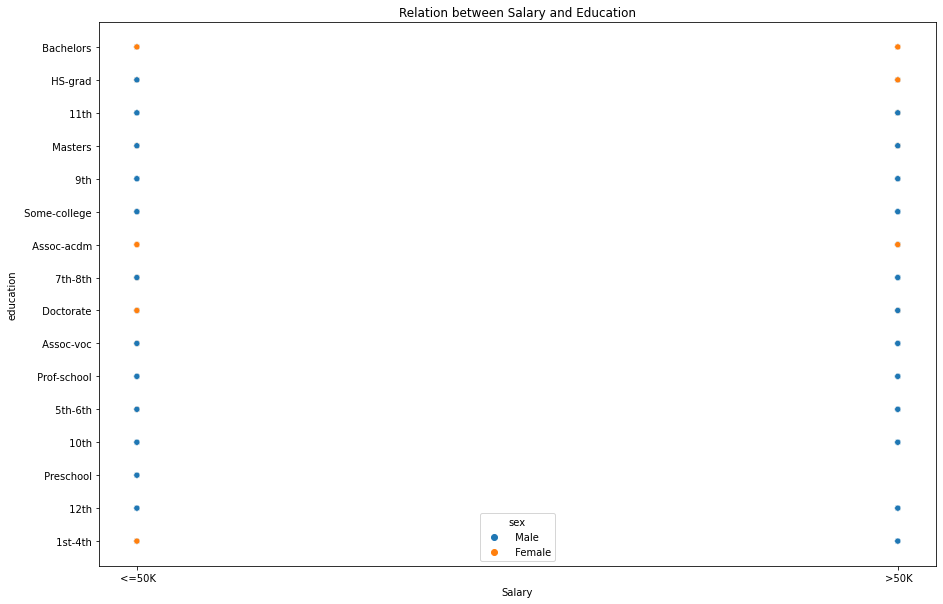

In [14]:
sns.scatterplot('Salary','education', data=train, hue='sex');
plt.title("Relation between Salary and Education")

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation between Age and Education, with sex as Hue')

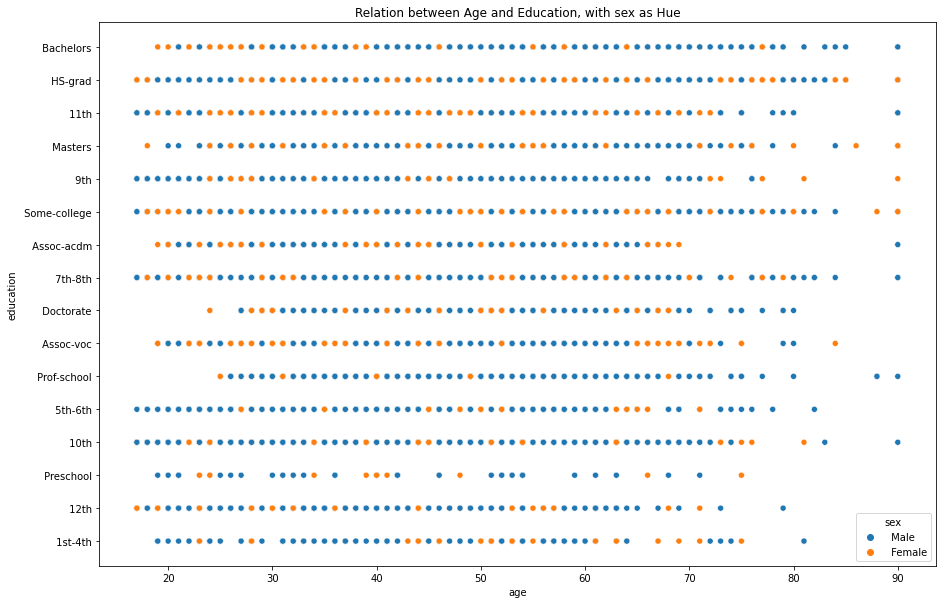

In [15]:
sns.scatterplot('age','education', data=train, hue='sex');
plt.title("Relation between Age and Education, with sex as Hue")

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation between Occupation and Education, with Salary as Hue')

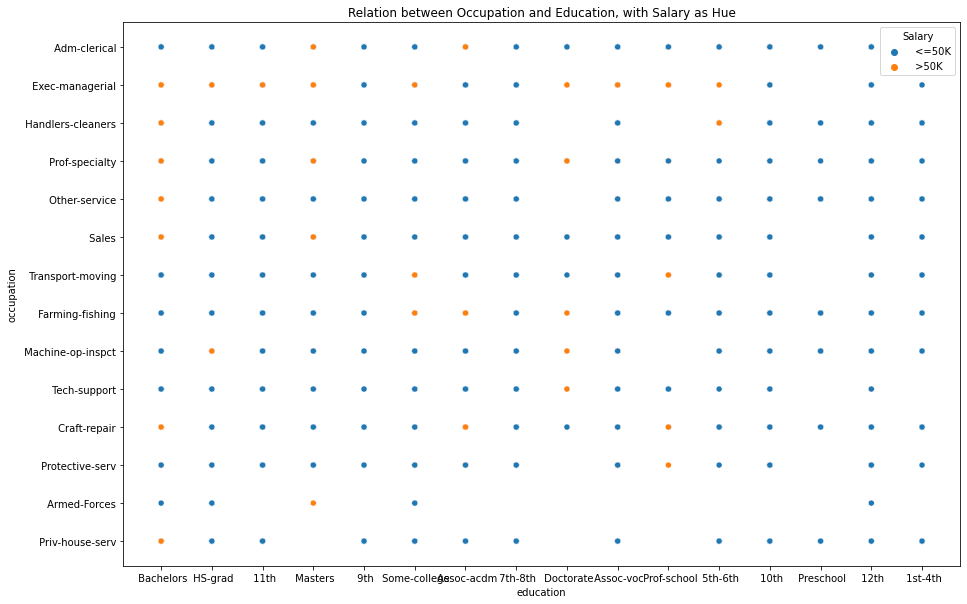

In [16]:
sns.scatterplot('education','occupation', data=train, hue='Salary');
plt.title("Relation between Occupation and Education, with Salary as Hue")

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation between Occupation and Education, with sex as Hue')

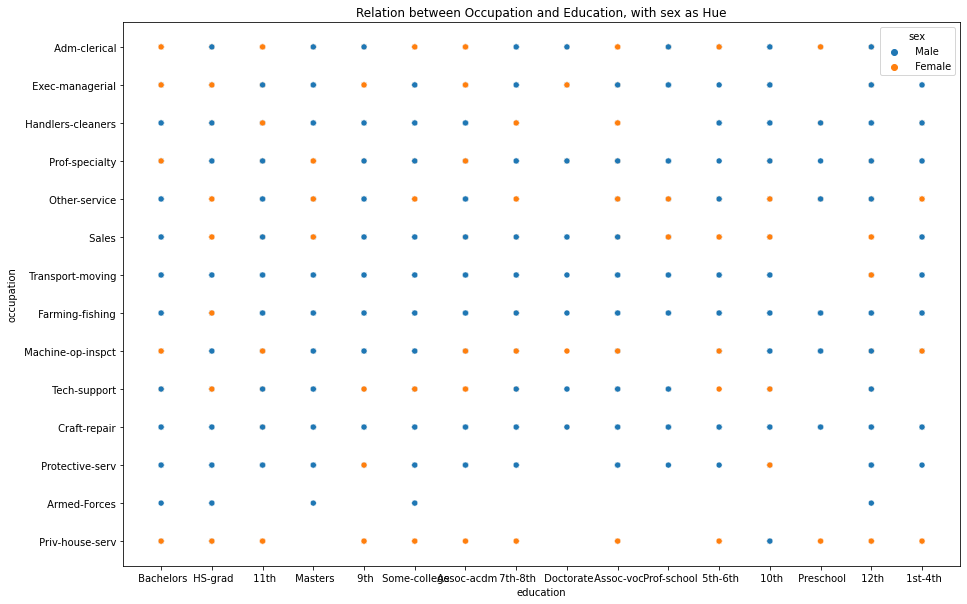

In [17]:
sns.scatterplot('education','occupation', data=train, hue='sex');
plt.title("Relation between Occupation and Education, with sex as Hue")

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation between Occupation and Education, with Marital Status as Hue')

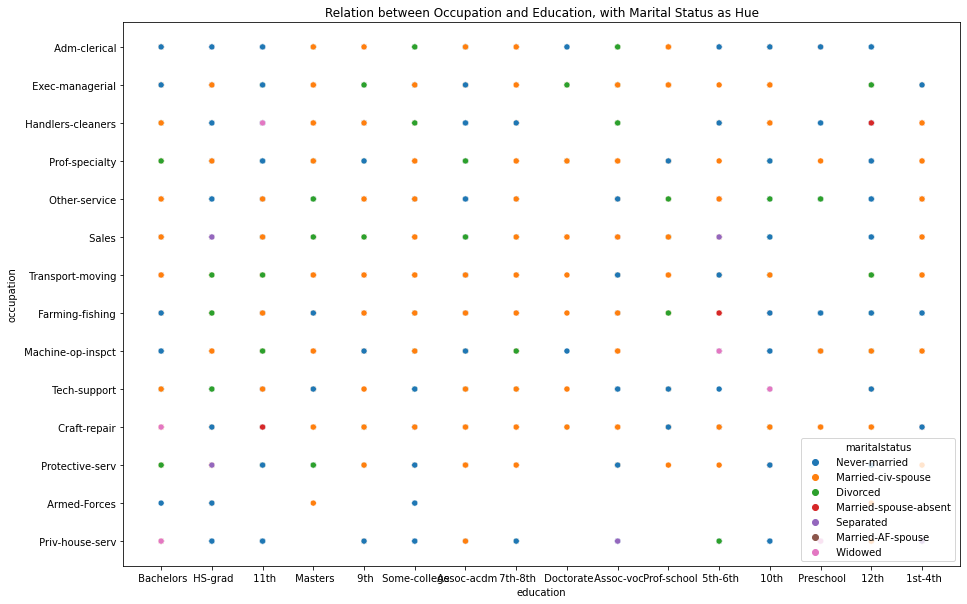

In [18]:
sns.scatterplot('education','occupation', data=train, hue='maritalstatus');
plt.title("Relation between Occupation and Education, with Marital Status as Hue")

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation between Age and Capital Gain with Salary as Hue')

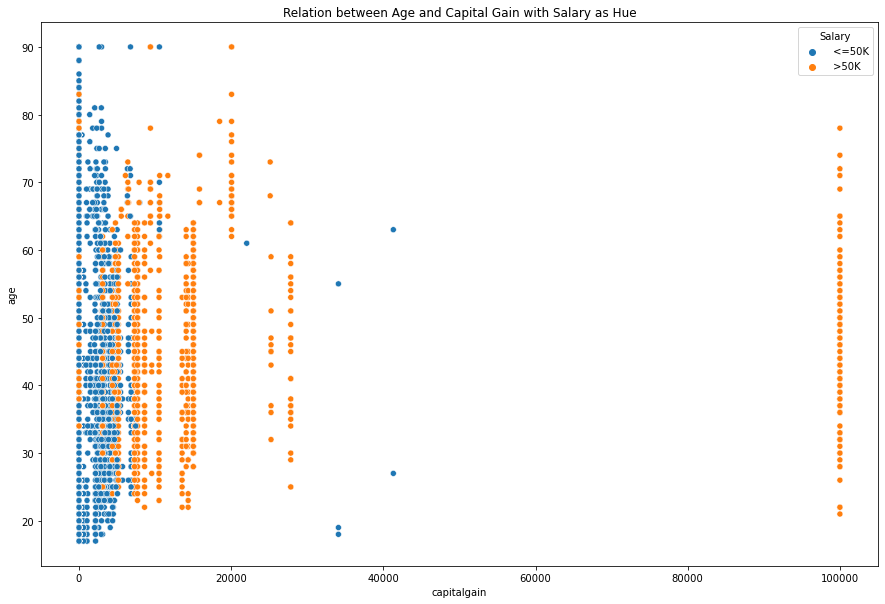

In [19]:
sns.scatterplot('capitalgain','age',data=train,hue='Salary');
plt.title("Relation between Age and Capital Gain with Salary as Hue")

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relation between Age and Capital Gain with sex as Hue')

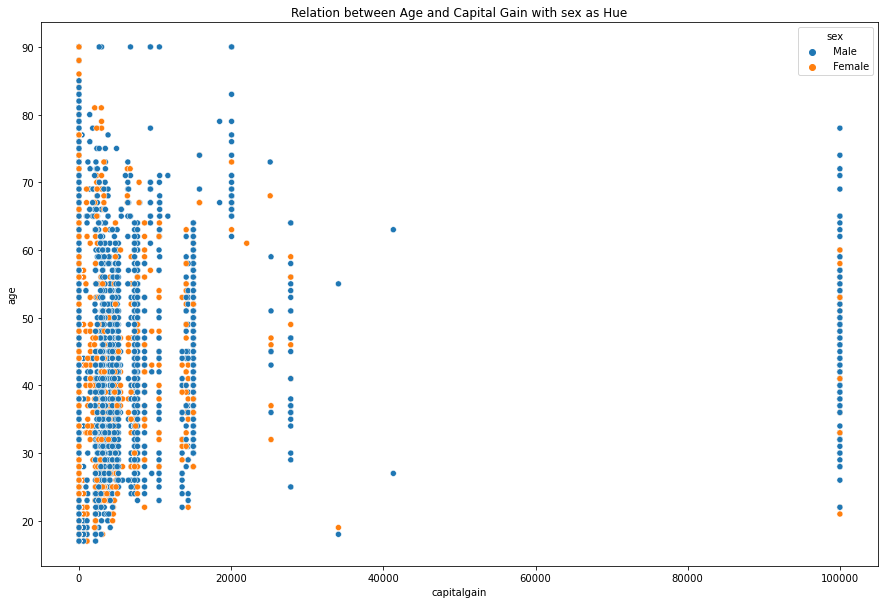

In [20]:
sns.scatterplot('capitalgain','age',data=train,hue='sex');
plt.title("Relation between Age and Capital Gain with sex as Hue")

In [21]:
train['sex'].value_counts()/train.shape[0]

 Male      0.675707
 Female    0.324293
Name: sex, dtype: float64

In [22]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64


<AxesSubplot:>

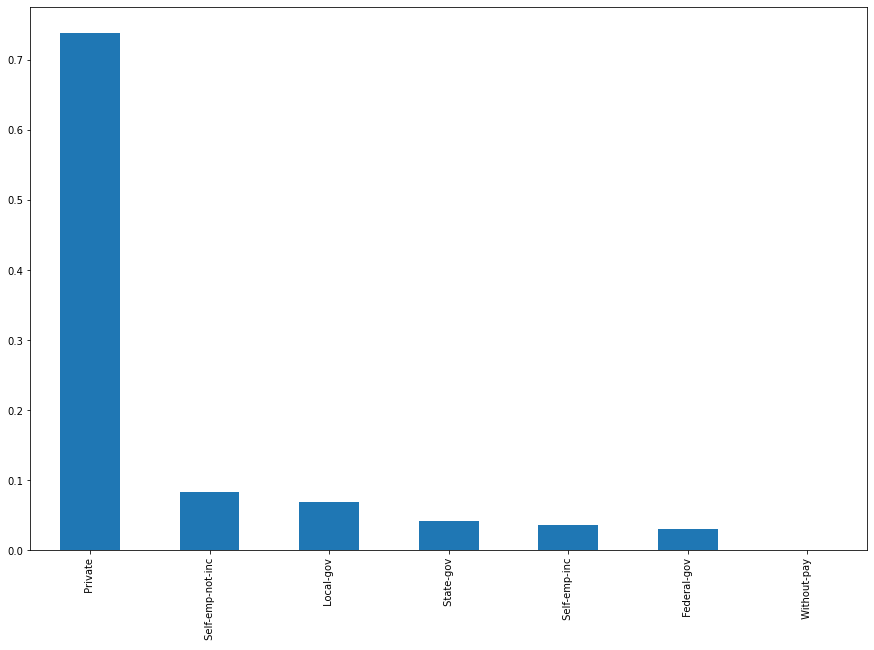

In [23]:
print(train['workclass'].value_counts()/train.shape[0])
(train['workclass'].value_counts()/train.shape[0]).plot(kind='bar')

In [24]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


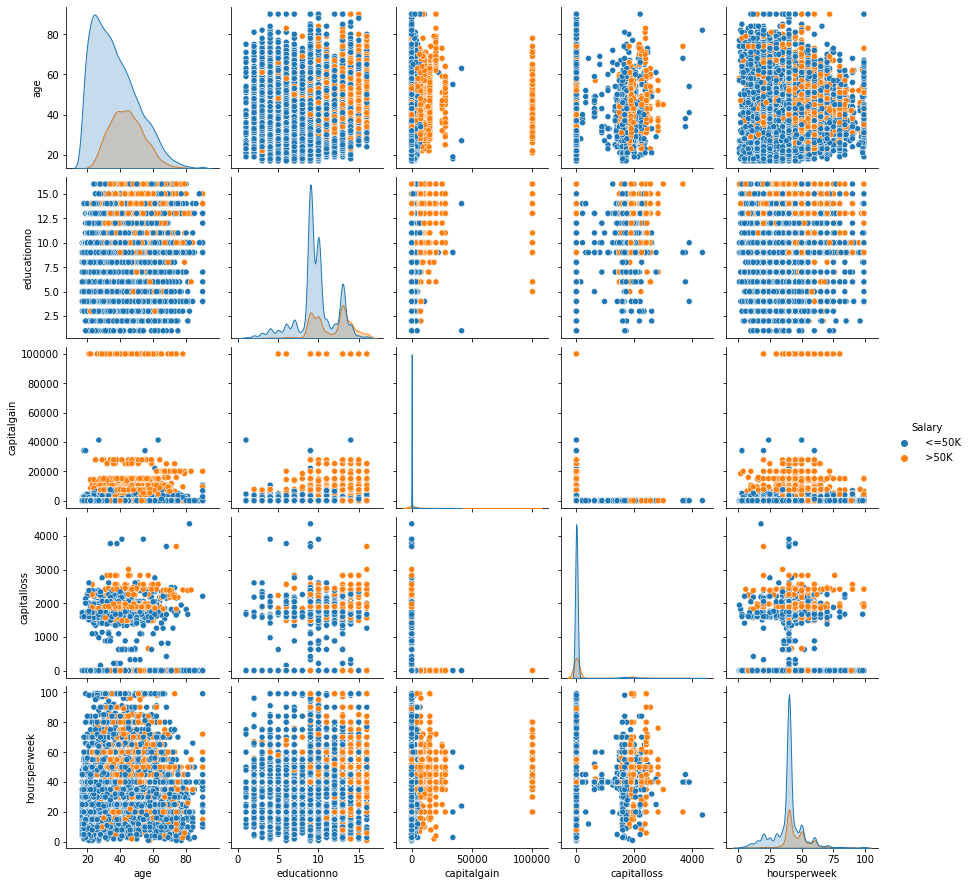

In [25]:
sns.pairplot(train,hue='Salary')

Now we will do multiple categorization of our columns

- `Age` column will be part of `Age Bins`
- `Workclass` column will be in dummy
- `Education` column will be in dummy - Looks like Educationno already have a number
- `maritalstatus` column will be transformed into dummy
- `Occupation` column will be transformed into dummy
- `relationship` column will be transformed into dummy
- `race` column will be transformed into dummy
- `sex` column will be transformed into dummy
- `capitalgain` column will be normalized/Standardized
- `capitalloss` and `hoursperweek` columns will be normalized/standardized
- `native` column will be transformed into dummy
- `Salary` column will be converted to show <=50 K as 0 and > 50 K as 1

We will create Dummy variables for Education column and will drop Educationno column

In [26]:
df_train = pd.get_dummies(train,drop_first=True)
df_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ >50K
0,39,13,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30157,40,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
30158,58,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30159,22,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
df_train.columns

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Han

In [28]:
df_train.drop(['educationno'],axis=1,inplace=True)
df_train.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners'

In [29]:
df_train.shape

(30161, 94)

## Now we will Normalize our data to bring every value within 0 and 1 excluding our output column

Normalization Function


In [30]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

norm_train = df_train.copy()

In [31]:
norm_train = norm_func(norm_train[:-1])
norm_train

,age,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ >50K
0,0.301370,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.452055,0.00000,0.0,0.122449,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.287671,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.493151,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.150685,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30155,0.068493,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30156,0.136986,0.00000,0.0,0.377551,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30157,0.315068,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
30158,0.561644,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Preparing a Naive Bayes model on training dataset set

In [32]:
from sklearn.naive_bayes import MultinomialNB as MB

In [135]:
from sklearn.model_selection import train_test_split
import random

In [136]:
df_x = norm_train.drop(['Salary_ >50K'],axis=1)
df_y = norm_train['Salary_ >50K']

In [137]:
df_y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
30155    0.0
30156    0.0
30157    1.0
30158    0.0
30159    0.0
Name: Salary_ >50K, Length: 30160, dtype: float64

In [138]:
# Splitting our data into 70% and 30%
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=123)
y_train

9318     1.0
21601    0.0
11574    0.0
9809     1.0
3171     1.0
        ... 
28636    0.0
17730    0.0
28030    1.0
15725    0.0
19966    1.0
Name: Salary_ >50K, Length: 21112, dtype: float64

In [139]:
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)

MultinomialNB()

In [140]:
test_pred_m = classifier_mb.predict(x_test)
accuracy_test = np.mean(test_pred_m == y_test)
accuracy_test

0.8192970822281167

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy_score(test_pred_m, y_test)

0.8192970822281167

In [143]:
pd.crosstab(test_pred_m, y_test)

Salary_ >50K,0.0,1.0
row_0,,
0.0,5956,805
1.0,830,1457


We are getting 82% of accuracy when we normalized our dataset

We will load our test dataset to see how this works now

In [122]:
test = pd.read_csv('SalaryData_Test.csv')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


We will now do the same transformation which we did for our training dataset

In [123]:
test['Salary'].value_counts()/test.shape[0]

 <=50K    0.754316
 >50K     0.245684
Name: Salary, dtype: float64

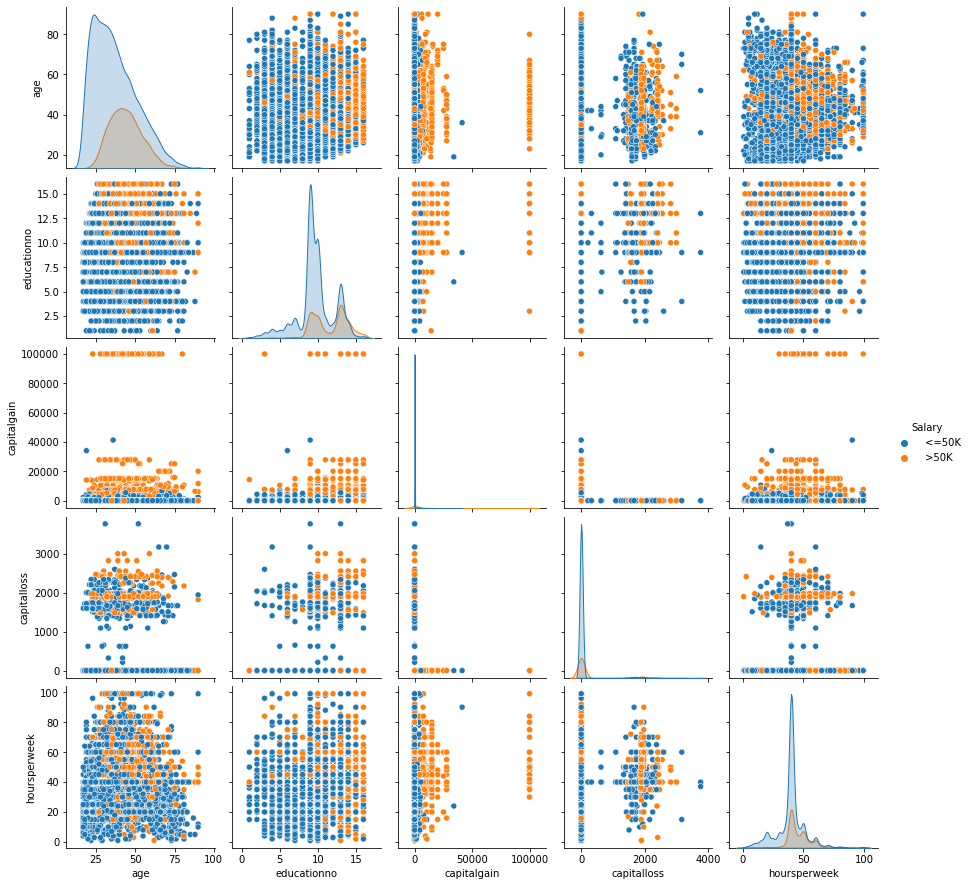

In [124]:
sns.pairplot(test,hue='Salary')

<AxesSubplot:>

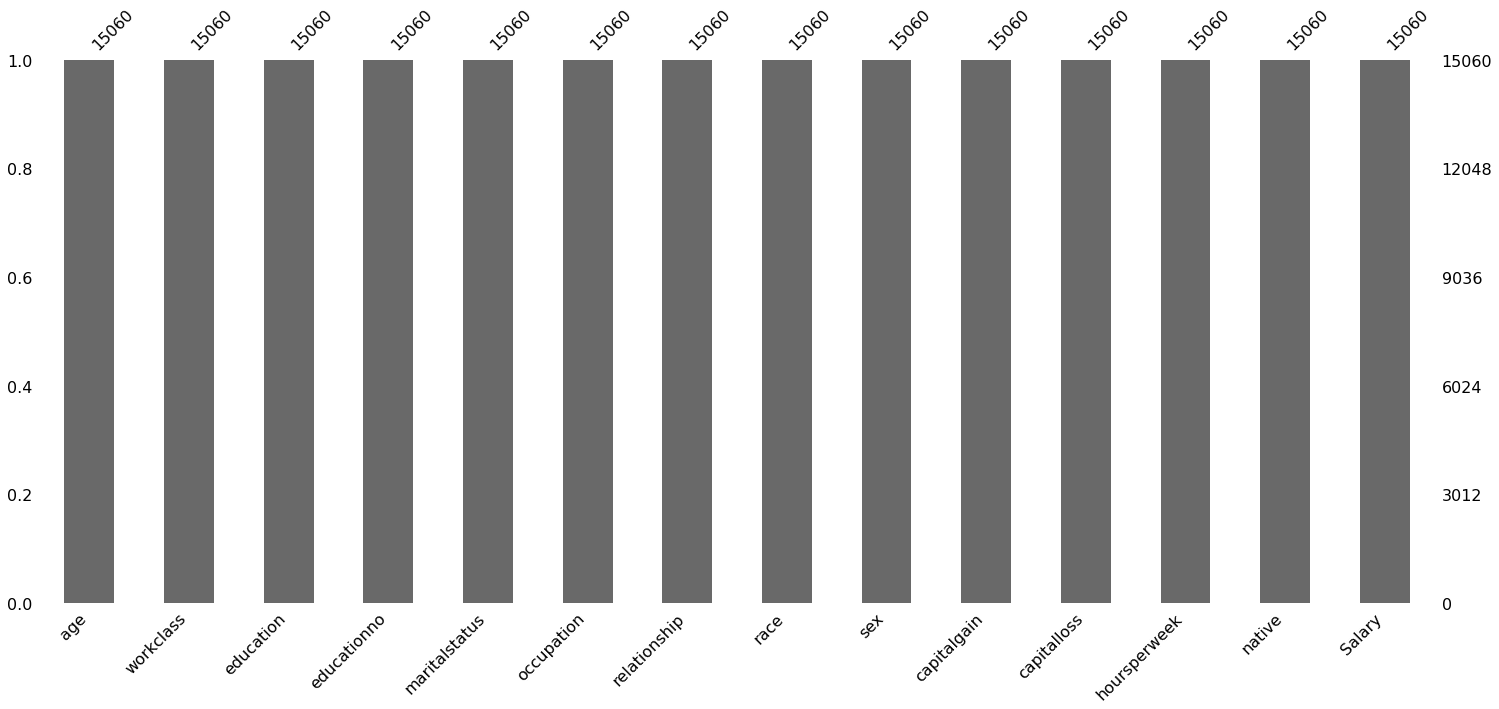

In [125]:
# lets check for any missing value in the data

msno.bar(test)

# no missing value

We can now transform our data to build it in the model

In [126]:
df_test = pd.get_dummies(test,drop_first=True)
df_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ >50K
0,25,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,12,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,10,7688,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,34,6,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15056,39,13,0,0,36,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15057,38,13,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15058,44,13,5455,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [127]:
df_test.drop(['educationno'],axis=1,inplace=True)
df_test.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners'

In [130]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

norm_test = df_test.copy()

In [131]:
norm_test = norm_func(norm_test)
norm_test

,age,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ >50K
0,0.109589,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.287671,0.000000,0.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.150685,0.000000,0.0,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.369863,0.076881,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.232877,0.000000,0.0,0.295918,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15056,0.301370,0.000000,0.0,0.357143,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15057,0.287671,0.000000,0.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15058,0.369863,0.054551,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [132]:
df_x = norm_test.drop(['Salary_ >50K'],axis=1)
df_y = norm_test['Salary_ >50K']

In [144]:
test_pred_m = classifier_mb.predict(df_x)

In [145]:
accuracy_test = np.mean(test_pred_m == df_y)
accuracy_test

0.818236074270557

In [146]:
accuracy_score(test_pred_m, df_y)

0.818236074270557

In [147]:
pd.crosstab(test_pred_m, df_y)

Salary_ >50K,0.0,1.0
row_0,,
0.0,19826,2655
1.0,2827,4852


From the above models, we have successfully created a model which predicts wiht 82% of accuracy